In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-train-cell/cell_images/test/uninfected/C181P142ThinF_IMG_20151127_155722_cell_78.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C202ThinF_IMG_20151015_151736_cell_123.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C99P60ThinF_IMG_20150918_141351_cell_22.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C186P147NThinF_IMG_20151203_150322_cell_90.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C94P55ThinF_IMG_20150821_165519_cell_55.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C218ThinF_IMG_20151106_144143_cell_170.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C67P28N_ThinF_IMG_20150819_115955_cell_13.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C114P75ThinF_IMG_20150930_150057_cell_135.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C38P3thinF_original_IMG_20150621_112246_cell_218.png
/kaggle/input/test-train-cell/cell_images/test/uninfected/C220Thin

In [48]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Reading the data


In [3]:
data_dir_test ='/kaggle/input/test-train-cell/cell_images/test'
data_dir_train ='/kaggle/input/test-train-cell/cell_images/train'

In [4]:
os.listdir(data_dir_test)

['uninfected', 'parasitized']

In [7]:
os.listdir(data_dir_test +'/parasitized')[0]

'C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [8]:
para_cell = data_dir_test + '/parasitized/' +  os.listdir(data_dir_test +'/parasitized')[0]


In [9]:
para_cell

'/kaggle/input/test-train-cell/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [10]:
plt.imread(para_cell).shape

(136, 151, 3)

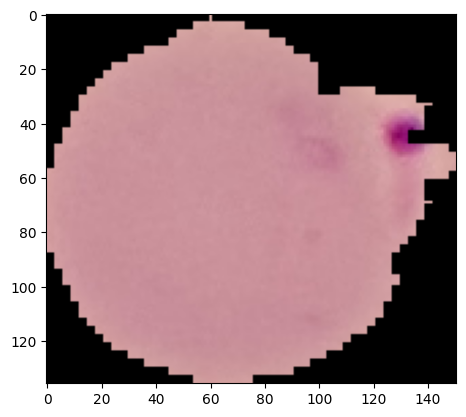

In [11]:
plt.imshow(plt.imread(para_cell))

In [15]:
uninfec =  data_dir_test + '/uninfected/' +  os.listdir(data_dir_test +'/uninfected')[5]

In [16]:
plt.imread(uninfec).shape

(145, 124, 3)

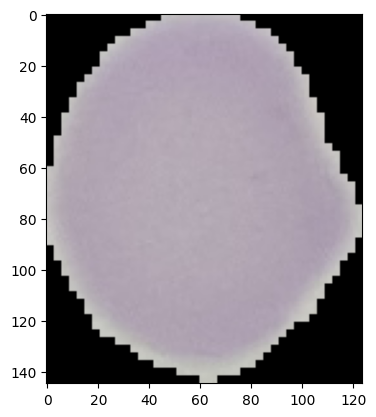

In [21]:
plt.imshow(plt.imread(uninfec))

In [24]:
dim1=[]
dim2=[]
for img_filename in os.listdir(data_dir_test +'/uninfected'):
    img = plt.imread(data_dir_test +'/uninfected/' + img_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

<Axes: >

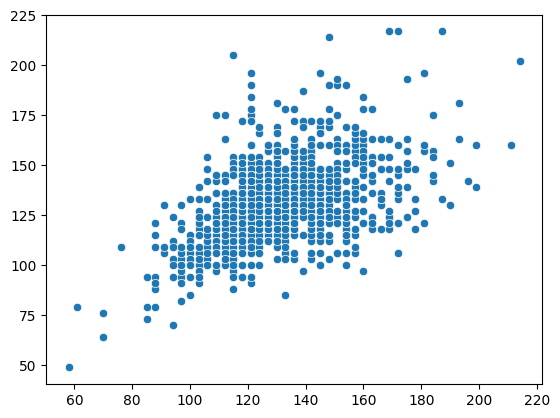

In [25]:
sns.scatterplot(x=dim1,y=dim2)

In [26]:
np.mean(dim1)

130.92538461538462

In [27]:
np.mean(dim2)

130.75

In [28]:
img_shape = (130,130,3)

### Pre processing

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-08 10:03:50.835651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 10:03:50.835768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 10:03:50.994290: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [31]:
img_gen.flow_from_directory(data_dir_train)


Found 24958 images belonging to 2 classes.


In [32]:
img_gen.flow_from_directory(data_dir_test)

Found 2600 images belonging to 2 classes.


In [36]:
### Model Creation

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D ,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(filters=32 , kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64 , kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [39]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:
early = EarlyStopping(monitor='val_loss',patience=2)

In [41]:
batch_size = 16 #Depends upon computer hardware(RAM)as model will load all the images at once


In [42]:
img_shape[:2]

(130, 130)

In [43]:
train_img_gen = img_gen.flow_from_directory(data_dir_train,
                                           target_size=img_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 24958 images belonging to 2 classes.


In [44]:
test_img_gen = img_gen.flow_from_directory(data_dir_test,
                                           target_size=img_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',
                                          shuffle=False)

Found 2600 images belonging to 2 classes.


In [45]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [49]:
model.fit(train_img_gen,epochs=20 , validation_data=test_img_gen , callbacks=[early])

Epoch 1/20
1558/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5369 - loss: 0.6925

W0000 00:00:1715163081.733014     265 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - accuracy: 0.5370 - loss: 0.6925 - val_accuracy: 0.5335 - val_loss: 0.6871
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 167s 106ms/step - accuracy: 0.5625 - loss: 0.6826 - val_accuracy: 0.5835 - val_loss: 0.6772
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 145s 92ms/step - accuracy: 0.5839 - loss: 0.6821 - val_accuracy: 0.8938 - val_loss: 0.3114
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.9265 - loss: 0.2411 - val_accuracy: 0.9346 - val_loss: 0.1998
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.9370 - loss: 0.1988 - val_accuracy: 0.9431 - val_loss: 0.1763
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.9434 - loss: 0.1870 - val_accuracy: 0.9404 - val_loss: 0.1810
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.9434 - loss: 0.1797 - val_accuracy: 0.9454 - val_loss: 0.1653
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.9452 - 

### Model Evaluation

In [52]:
metrics = pd.DataFrame(model.history.history)

In [53]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.546959,0.688697,0.533462,0.687089
1,0.568275,0.681695,0.583462,0.677172
2,0.622686,0.649614,0.893846,0.311374
3,0.932166,0.219433,0.934615,0.199751
4,0.939138,0.193457,0.943077,0.176329
5,0.943185,0.183474,0.940385,0.181032
6,0.944346,0.174757,0.945385,0.165258
7,0.945829,0.172252,0.935385,0.187280
8,0.945508,0.173643,0.944615,0.178556


<Axes: >

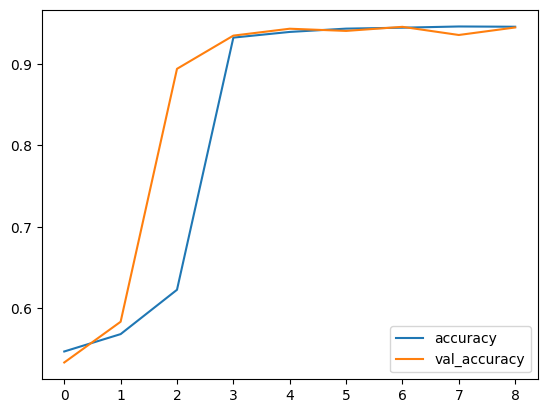

In [54]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

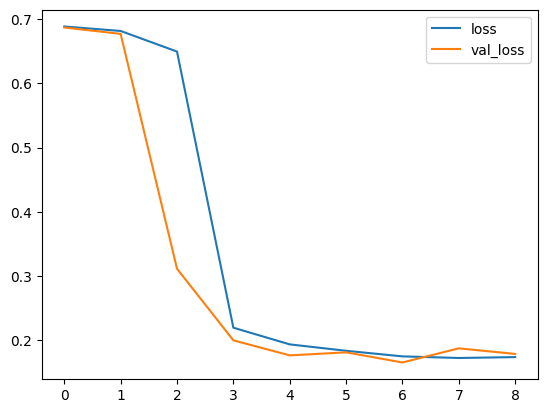

In [55]:
metrics[['loss','val_loss']].plot()

In [56]:
model.evaluate(test_img_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9422 - loss: 0.1645


[0.1772269606590271, 0.9411538243293762]

In [65]:
model.metrics_names

['loss', 'compile_metrics']

In [67]:
test_pred = model.predict(test_img_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


In [68]:
test_pred = test_pred >0.5

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [71]:
print(classification_report(test_img_gen.classes,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1300
           1       0.95      0.94      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



<Axes: >

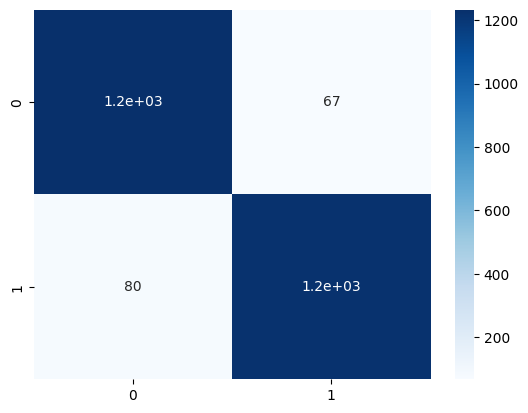

In [72]:
sns.heatmap(data=confusion_matrix(test_img_gen.classes,test_pred),annot = True , cmap='Blues')

### Making Single Prediction

In [73]:
para_cell

'/kaggle/input/test-train-cell/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [74]:
os.listdir(data_dir_test)

['uninfected', 'parasitized']

In [76]:
data_dir_test

'/kaggle/input/test-train-cell/cell_images/test'

In [78]:
os.listdir(data_dir_test +'/parasitized')[69]

'C180P141NThinF_IMG_20151201_165423_cell_157.png'

In [79]:
new = data_dir_test + '/parasitized/' + os.listdir(data_dir_test +'/parasitized')[69]

In [80]:
new

'/kaggle/input/test-train-cell/cell_images/test/parasitized/C180P141NThinF_IMG_20151201_165423_cell_157.png'

In [82]:
from tensorflow.keras.preprocessing import image

In [84]:
new_img = image.load_img(new,target_size=img_shape)

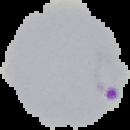

In [85]:
new_img

In [86]:
new_img_arr = image.img_to_array(new_img)

In [87]:
new_img_arr.shape

(130, 130, 3)

In [88]:
new_img_arr=new_img_arr.reshape(1,130,130,3)

In [90]:
model.predict(new_img_arr) >0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[False]])

In [93]:
False ==0

True

In [92]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [94]:
model.save('best_model_GPU.keras')